In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage.feature import hog
from skimage import data, exposure
from tqdm import tqdm

# Dataset

Dataset yang digunakan memiliki format CSV dengan data yang ditampung adalah nama gambar dan kelasnya. Dataset ini dibuat dengan sebelumnya membuat dataset CSV setiap kelas dengan format yang serupa. Program dibawah ini digunakan untuk membuat CSV dari gambar kelas 5 dengan format dataframe yaitu image yang menampung nama gambar dan class yang menyatakan kelas.

from PIL import Image
import os
import pandas as pd

image_class_1 = []

for i in range(2, len(os.listdir(os.getcwd()))):
    image_class_1.append(os.listdir(os.getcwd())[i])

data_class_1 = pd.DataFrame({'image' : image_class_1})
data_class_1['class'] = 5

data_class_1.to_csv('data_class_5.csv', index = False)

Hasil CSV kelas 5 ini kemudian akan digabungkan dengan hasil CSV kelas lainnya menjadi 1 buah CSV utama yang akan digunakan sebagai dataset.

In [2]:
data = pd.read_csv('cow_neckband_image.csv')

In [3]:
data

,image,class
0,WA01_2015_10_1_16_22_15_253889_id1.bmp,1
1,WA01_2015_10_1_16_22_15_253889_id10.bmp,1
2,WA01_2015_10_1_16_22_15_253889_id11.bmp,1
3,WA01_2015_10_1_16_22_15_253889_id2.bmp,1
4,WA01_2015_10_1_16_22_15_253889_id3.bmp,1
...,...,...
1943,WA08_2016_10_2_8_51_15_737651_id6.bmp,8
1944,WA08_2016_10_4_21_34_21_735098_id3.bmp,8
1945,WA08_2016_10_8_7_11_55_440456_id1.bmp,8
1946,WA08_2016_10_8_7_11_55_440456_id2.bmp,8


In [4]:
labels = data['class']

# Data Preprocessing

## Change BMP to Grayscale

In [5]:
data_gray = []

for i in tqdm(data['image']):
    data_gray.append(color.rgb2gray(np.array(Image.open(i).convert('RGB'))))

100%|██████████████████████████████████████████████████████████████████████████████| 1948/1948 [01:34<00:00, 20.56it/s]


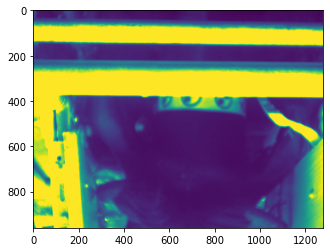

In [6]:
plt.imshow(data_gray[25])

## Histogram of Oriented Gradient

In [7]:
ppc = 16
hog_features = []

for image in tqdm(data_gray):
    fd = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(1, 1), visualize = False)
    hog_features.append(fd)

100%|██████████████████████████████████████████████████████████████████████████████| 1948/1948 [11:13<00:00,  2.89it/s]


In [8]:
hog_features = np.array(hog_features)
hog_features_dataframe = pd.concat([pd.DataFrame(hog_features), labels], axis = 1)

In [9]:
hog_features_dataframe

,0,1,2,3,4,5,6,7,8,9,...,38391,38392,38393,38394,38395,38396,38397,38398,38399,class
0,0.501765,0.386377,0.262521,0.043766,0.169522,0.199817,0.455718,0.501765,0.353553,0.353553,...,0.361389,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,1
1,0.503229,0.497160,0.081575,0.116340,0.199857,0.170397,0.396467,0.503229,0.353553,0.353553,...,0.363345,0.366451,0.366451,0.366451,0.244941,0.366451,0.366451,0.366451,0.366451,1
2,0.492430,0.492430,0.165620,0.106980,0.200174,0.176369,0.403099,0.492430,0.353553,0.353553,...,0.357789,0.353842,0.353842,0.351529,0.353842,0.353842,0.353842,0.353842,0.353842,1
3,0.478784,0.478784,0.105959,0.043344,0.203028,0.169516,0.478784,0.478784,0.353553,0.353553,...,0.354306,0.370172,0.370172,0.370172,0.370172,0.370172,0.370172,0.251628,0.338409,1
4,0.492818,0.425877,0.113888,0.157441,0.160812,0.162488,0.492818,0.492818,0.353553,0.353553,...,0.353553,0.358815,0.358815,0.358815,0.358815,0.358815,0.358815,0.314268,0.358815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,0.355194,0.341852,0.355194,0.355194,0.355194,0.355194,0.355194,0.355194,0.354385,0.347680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
1944,0.352697,0.368670,0.368670,0.368670,0.368670,0.368670,0.368670,0.245149,0.354384,0.347681,...,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,8
1945,0.355034,0.355034,0.355034,0.355034,0.355034,0.355034,0.355034,0.343013,0.354741,0.345127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
1946,0.353962,0.353962,0.350679,0.353962,0.353962,0.353962,0.353962,0.353962,0.353553,0.353553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8


# Modelling

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(hog_features_dataframe, test_size = 0.3)

In [11]:
train.shape, test.shape

((1363, 38401), (585, 38401))

In [12]:
y_train = train['class']
y_test = test['class']

In [13]:
train.drop(['class'], axis = 1, inplace = True)
test.drop(['class'], axis = 1, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier()
rf.fit(train, y_train)
print("Random Forest Accuracy Score : ", accuracy_score(rf.predict(test), y_test))
print("Random Forest Confusion Matrix : \n", confusion_matrix(rf.predict(test), y_test))

Random Forest Accuracy Score :  0.8683760683760684
Random Forest Confusion Matrix : 
 [[102   0   0   1   0   1   5   5]
 [  0  77  12   0   2   2   1   3]
 [  0   1  89   1   5   2   1   5]
 [  0   0   0  55   0   0   0   0]
 [  1   0   0   2  39   3   2   6]
 [  0   0   0   0   1  47   0   1]
 [  0   0   0   1   2   0  54   2]
 [  0   2   2   4   0   1   0  45]]


## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(train, y_train)
print("Logistic Regression Accuracy Score : ", accuracy_score(logreg.predict(test), y_test))
print("Logistic Regression Confusion Matrix : \n", confusion_matrix(logreg.predict(test), y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy Score :  0.9282051282051282
Logistic Regression Confusion Matrix : 
 [[102   0   0   0   0   0   0   2]
 [  0  75   4   0   1   2   0   0]
 [  0   2  97   1   1   0   2   2]
 [  0   0   0  59   1   0   0   1]
 [  0   1   0   1  43   0   1   4]
 [  0   1   0   0   1  52   1   1]
 [  0   0   0   2   2   0  59   1]
 [  1   1   2   1   0   2   0  56]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(train, y_train)
print("KNN Accuracy Score : ", accuracy_score(knn.predict(test), y_test))
print("KNN Confusion Matrix : \n", confusion_matrix(knn.predict(test), y_test))

KNN Accuracy Score :  0.8341880341880342
KNN Confusion Matrix : 
 [[103   0   1   1   3   3   4   6]
 [  0  64   5   0   0   4   0   1]
 [  0  12  96   0   1   2   0   2]
 [  0   0   0  56   2   2   4   2]
 [  0   1   1   0  35   3   3   5]
 [  0   1   0   0   4  39   4   2]
 [  0   2   0   5   3   3  48   2]
 [  0   0   0   2   1   0   0  47]]


## Voting Classifier (KNN, Random Forest, Logistic Regression)